In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import math

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics

import statsmodels.api as sm

In [2]:
df = sm.datasets.fair.load_pandas().data

In [3]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [4]:
def affair_check(x):
    if x != 0:
        return 1
    else:
        return 0

In [5]:
df['Had_Affair'] = df['affairs'].apply(affair_check)

In [6]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [7]:
df.groupby('Had_Affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


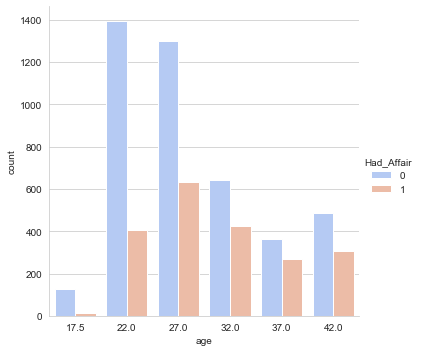

In [8]:
sns.catplot('age', data=df, hue='Had_Affair',kind='count', palette='coolwarm')

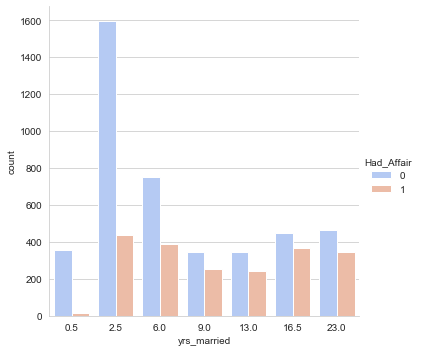

In [9]:
sns.catplot('yrs_married', data=df, hue='Had_Affair',kind='count', palette='coolwarm')

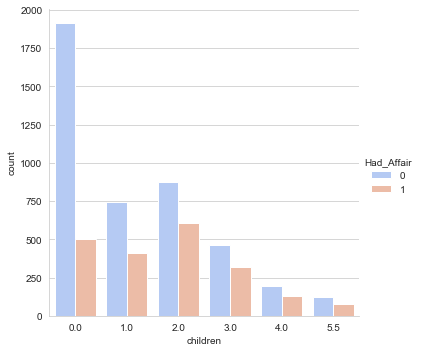

In [10]:
sns.catplot('children', data=df, hue='Had_Affair',kind='count', palette='coolwarm')

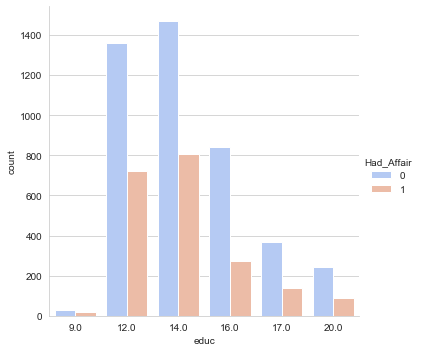

In [11]:
sns.catplot('educ', data=df, hue='Had_Affair',kind='count', palette='coolwarm')

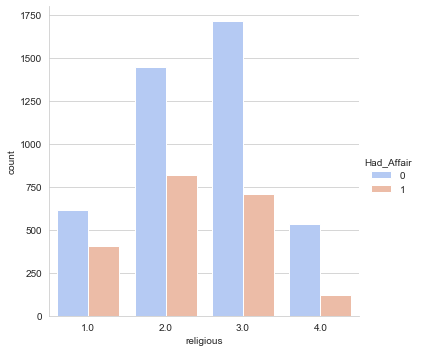

In [45]:
sns.catplot('religious', data=df, hue='Had_Affair',kind='count', palette='coolwarm')

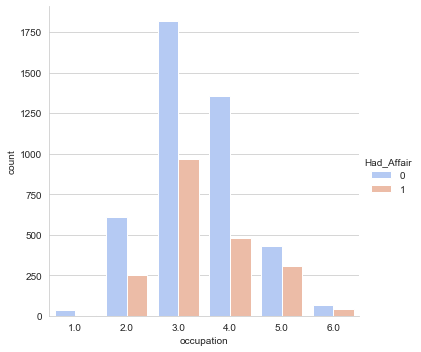

In [46]:
sns.catplot('occupation', data=df, hue='Had_Affair',kind='count', palette='coolwarm')

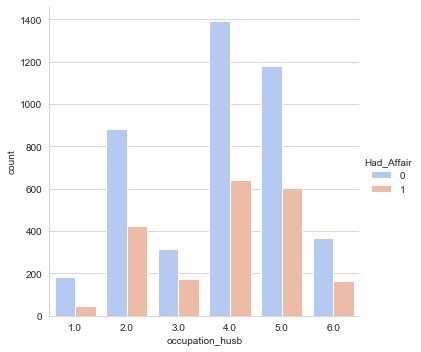

In [47]:
sns.catplot('occupation_husb', data=df, hue='Had_Affair',kind='count', palette='coolwarm')

In [12]:
occ_dummies = pd.get_dummies(df['occupation'])

In [13]:
hus_occ_dummies = pd.get_dummies(df['occupation_husb'])

In [14]:
occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [15]:
occ_dummies.columns = ['occ1','occ2','occ3','occ4','occ5','occ6']
hus_occ_dummies.columns = ['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [17]:
X = df.drop(['occupation','occupation_husb','Had_Affair'], axis=1)

In [19]:
dummies = pd.concat([occ_dummies,hus_occ_dummies], axis=1)

In [21]:
dummies.head()

,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,0,1,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,1,0,0


In [22]:
X = pd.concat([X, dummies], axis=1)

In [23]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


In [24]:
Y = df.Had_Affair

In [27]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


# Multicollinearity Consideration

In [28]:
X = X.drop(['occ1','hocc1'], axis=1)

In [30]:
X = X.drop(['affairs'], axis=1)

In [31]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0


In [34]:
Y = np.ravel(Y)

Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [35]:
log_model = LogisticRegression()

log_model.fit(X,Y)

log_model.score(X,Y)

C:\Users\panda\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7258875274897895

In [36]:
Y.mean()

0.3224945020420987

In [37]:
coeff_df = DataFrame(zip(X.columns, np.transpose(log_model.coef_)))

In [38]:
coeff_df

,0,1
0,rate_marriage,[-0.6978854180026768]
1,age,[-0.056347032908152]
2,yrs_married,[0.10390556524027485]
3,children,[0.018172782105056292]
4,religious,[-0.3684960487396638]
5,educ,[0.008789834665963826]
6,occ2,[0.2979785839591037]
7,occ3,[0.6079160723958301]
8,occ4,[0.34603776729459984]
9,occ5,[0.9423651396317297]


In [41]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

In [42]:
log_model2 = LogisticRegression()

log_model2.fit(X_train,Y_train)

C:\Users\panda\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
class_predict = log_model2.predict(X_test)

In [44]:
print (metrics.accuracy_score(Y_test, class_predict))

0.7204773869346733
